In [3]:
from keras.models import Sequential
from keras import layers
from keras.preprocessing.text import Tokenizer
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.datasets import fetch_20newsgroups
from sklearn.model_selection import train_test_split

#To fetch 20newsgroups training dataset
twenty_train = fetch_20newsgroups(subset='train', shuffle=True)
sentences = twenty_train.data
y = twenty_train.target

#tokenizing data
tokenizer = Tokenizer(num_words=2000)
tokenizer.fit_on_texts(sentences)
#getting the vocabulary of data
sentences = tokenizer.texts_to_matrix(sentences)

le = preprocessing.LabelEncoder()
y = le.fit_transform(y)
X_train, X_test, y_train, y_test = train_test_split(sentences, y, test_size=0.25, random_state=1000)

# Number of features
# print(input_dim)
model = Sequential()
model.add(layers.Dense(300,input_dim=2000, activation='relu'))
model.add(layers.Dense(20, activation='softmax'))
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['acc'])
history=model.fit(X_train,y_train, epochs=3, verbose=True, validation_data=(X_test,y_test), batch_size=256)
[test_loss, test_acc] = model.evaluate(X_test, y_test)
print("Evaluation result on Test Data : Loss = {}, accuracy = {}".format(test_loss, test_acc))


Epoch 1/3
34/34 [==============================] - 0s 13ms/step - loss: 2.1273 - acc: 0.5056 - val_loss: 1.3044 - val_acc: 0.7204
Epoch 2/3
34/34 [==============================] - 0s 14ms/step - loss: 0.8607 - acc: 0.8295 - val_loss: 0.8389 - val_acc: 0.7978
Epoch 3/3
89/89 [==============================] - 0s 2ms/step - loss: 0.6831 - acc: 0.8243
Evaluation result on Test Data : Loss = 0.6830682754516602, accuracy = 0.8243195414543152


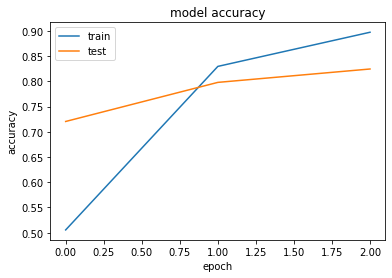

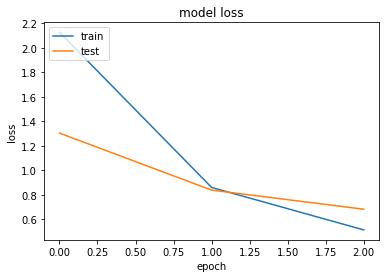

In [4]:
# summarize history for accuracy
import matplotlib.pyplot as plt
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [6]:
predict_classe = model.predict_classes(X_test[[2],:])
print("Predicted value:",predict_classe[0])
print("Actual value:",y_test[2])

Predicted value: 12
Actual value: 12
